In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

from astropy.io import ascii, fits
from astropy.io.fits import getdata

import glob

/Users/cbrasseur/anaconda/envs/gphoton/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [38]:
def graphAPOSpectra():
    
    M82 = {'blue':'M82_spec.0006b_CALSPEC.fits','red':'M82_spec.0006r_CALSPEC.fits'}
    M82Rot = {'blue':'M82_90Rot.0020b_CALSPEC.fits','red':'M82_90Rot.0020r_CALSPEC.fits'}
    Quasar = {'blue':'Quasar1_15.0003b_CALSPEC.fits','red':'Quasar1_15.0003r_CALSPEC.fits'}
    
    plt.style.use('fivethirtyeight')
    
    # set up figure 
    f, axs = plt.subplots(3,2, sharex='col', figsize=(20,20))
    f.set_facecolor('white')
    f.canvas.set_window_title("APO Spectra")
    
    #axs[-1].set_xlabel('Wavelength ($\mu m$)', size=20)
    #axs[0].set_title("Spectra",y=1.1, size=28, weight='bold')
    #axs[0].text(1,26,"Brasseur,Busch,Serigano",size=10) # fragile, if plot changes, must fix
    
    # Adding absorption and emission lines # SHOULD WE LABEL THESE?
    # CHANGE THESE, THESE ARE NOT THE RIGHT LINES
    #lines = [.686719,.759370, # sky absorption
    #         .55785, # sky emission
    #         .396847,.822696 #solar: Hbeta,ca+,O2
    #        ]
    #for p in range(3):
    #    for l in lines:
    #        axs[p].axvline(l,linestyle='--',linewidth=2,color='#8b8b8b')
            
    # Quasar
    axs[0,0].set_ylabel("Quasar Emission (Flux)")
    quasarBlu = fits.getdata(Quasar['blue'])
    quasarRed = fits.getdata(Quasar['red'])
    axs[0,0].plot(quasarBlu['Wavelength']*10**-4,quasarBlu['Flux'],'#6d904f',linewidth=2)
    axs[0,1].plot(quasarRed['Wavelength']*10**-4,quasarRed['Flux'],'#6d904f',linewidth=2)
    
    # M82 Rot
    axs[1,0].set_ylabel("M82 Rotated Emission (Flux)")
    m82RotBlu = fits.getdata(M82Rot['blue'])
    m82RotRed = fits.getdata(M82Rot['red'])
    axs[1,0].plot(m82RotBlu['Wavelength']*10**-4,m82RotBlu['Flux'],'#a90548',linewidth=2)
    axs[1,1].plot(m82RotRed['Wavelength']*10**-4,m82RotRed['Flux'],'#a90548',linewidth=2)
    
    # M82
    axs[2,0].set_ylabel("M82 Emission (Flux)")
    m82Blu = fits.getdata(M82['blue'])
    m82Red = fits.getdata(M82['red'])
    axs[2,0].plot(m82Blu['Wavelength']*10**-4,m82Blu['Flux'],'#008fd5',linewidth=2)
    axs[2,1].plot(m82Red['Wavelength']*10**-4,m82Red['Flux'],'#008fd5',linewidth=2)
    #axs[2].set_ylim((-0.25*10**-14,1.75*10**-14))
  

    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)   
    plt.tight_layout()    
    plt.savefig('spectra.pdf',facecolor=f.get_facecolor())
    plt.show()
    
    
    

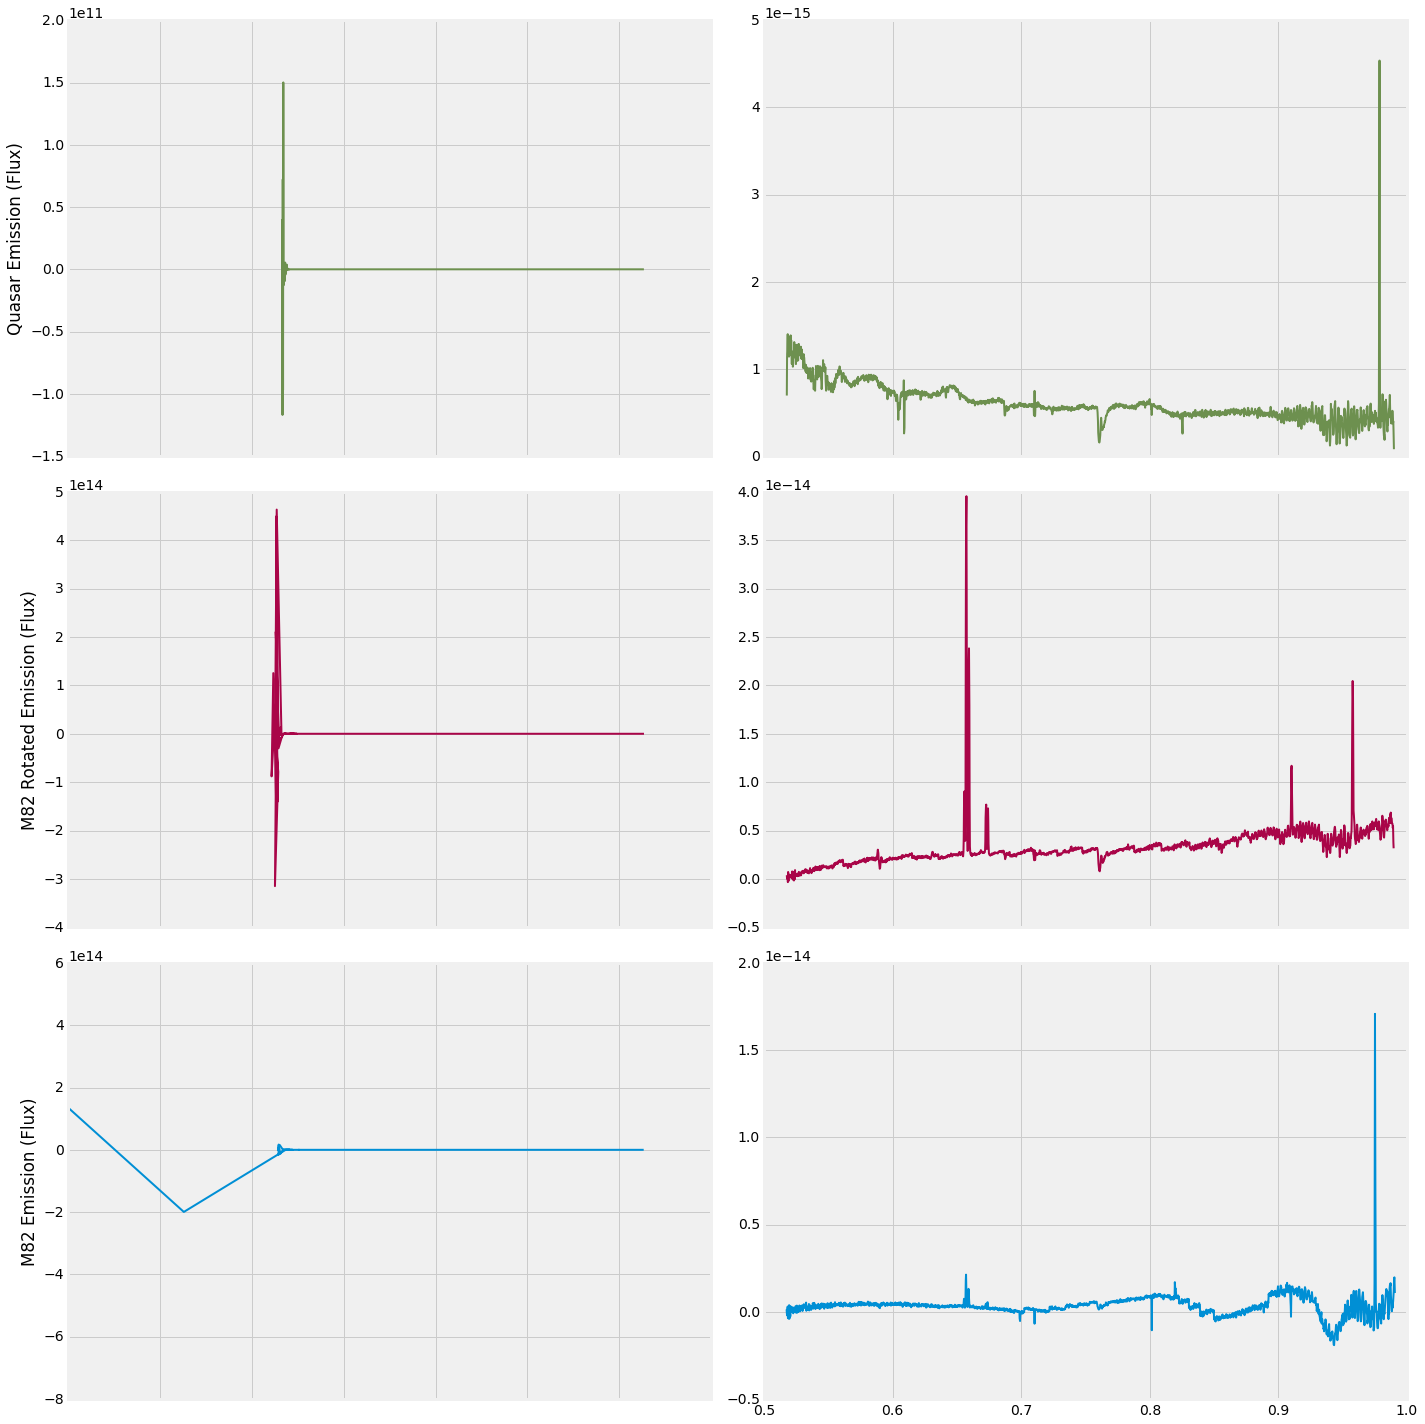

In [39]:
graphAPOSpectra()